# Lab 13/ Spotify data set 🤢🤢🤢

Minakov Nikita, csse 1707DA

@minakov.nv

In [1]:
from __future__ import print_function, division
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

import numpy as np

import pandas as pd
import nsfg
import first
import thinkstats2
import thinkplot

import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

from scipy import stats
import statistics 
import brfss
import random

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.formula.api as smf

## Survival analysis

From the sample of music popularity, we can compute the survival function from the CDF and the hazard function from the survival function.

    Here's the distribution of popularity in the NSFG dataset.

In [2]:
db_read = pd.read_csv('SpotifyFeatures.csv', delimiter = ',')
db_read

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.61100,0.389,99373,0.9100,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.8140
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.24600,0.590,137373,0.7370,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.8160
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.95200,0.663,170267,0.1310,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.3680
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.70300,0.240,152427,0.3260,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.2270
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.95000,0.331,82625,0.2250,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.3900
5,Movie,Henri Salvador,Le petit souper aux chandelles,0Mf1jKa8eNAf1a4PwTbizj,0,0.74900,0.578,160627,0.0948,0.000000,C#,0.1070,-14.970,Major,0.1430,87.479,4/4,0.3580
6,Movie,Martin & les fées,"Premières recherches (par Paul Ventimila, Lori...",0NUiKYRd6jt1LKMYGkUdnZ,2,0.34400,0.703,212293,0.2700,0.000000,C#,0.1050,-12.675,Major,0.9530,82.873,4/4,0.5330
7,Movie,Laura Mayne,Let Me Let Go,0PbIF9YVD505GutwotpB5C,15,0.93900,0.416,240067,0.2690,0.000000,F#,0.1130,-8.949,Major,0.0286,96.827,4/4,0.2740
8,Movie,Chorus,Helka,0ST6uPfvaPpJLtQwhE6KfC,0,0.00104,0.734,226200,0.4810,0.000860,C,0.0765,-7.725,Major,0.0460,125.080,4/4,0.7650
9,Movie,Le Club des Juniors,Les bisous des bisounours,0VSqZ3KStsjcfERGdcWpFO,10,0.31900,0.598,152694,0.7050,0.001250,G,0.3490,-7.790,Major,0.0281,137.496,4/4,0.7180


In [3]:
complete = db_read.popularity
cdf = thinkstats2.Cdf(complete, label='cdf')

The survival function is just the complementary CDF.

In [4]:
import survival

def MakeSurvivalFromCdf(cdf, label=''):
    """Makes a survival function based on a CDF.

    cdf: Cdf
    
    returns: SurvivalFunction
    """
    ts = cdf.xs
    ss = 1 - cdf.ps
    return survival.SurvivalFunction(ts, ss, label)

In [5]:
sf = MakeSurvivalFromCdf(cdf, label='survival')

In [6]:
print(cdf[13])
print(sf[13])

0.08782468578794715
0.9121753142120529


Here's the CDF and SF.

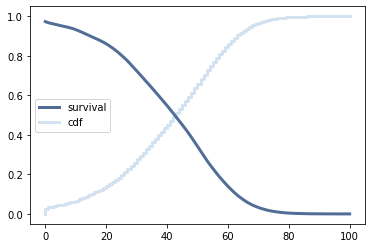

In [7]:
thinkplot.Plot(sf)
thinkplot.Cdf(cdf, alpha=0.2)
thinkplot.Config(loc='center left')

And here's the hazard function.

In [8]:
hf = sf.MakeHazardFunction(label='hazard')
print(hf[39])

0.030532610534522987


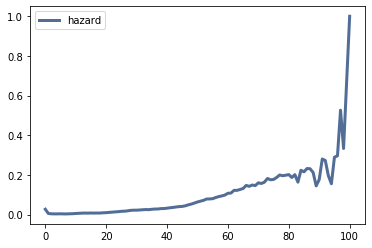

In [9]:
thinkplot.Plot(hf)
thinkplot.Config( loc='upper left')

In [10]:
db_read.corr()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
popularity,1.000000,-0.381295,0.256564,0.002348,0.248922,-0.210983,-0.167995,0.363011,-0.151076,0.081039,0.060076
acousticness,-0.381295,1.000000,-0.364546,0.011203,-0.725576,0.316154,0.069004,-0.690202,0.150935,-0.238247,-0.325798
danceability,0.256564,-0.364546,1.000000,-0.125781,0.325807,-0.364941,-0.041684,0.438668,0.134560,0.021939,0.547154
duration_ms,0.002348,0.011203,-0.125781,1.000000,-0.030550,0.076021,0.023783,-0.047618,-0.016171,-0.028456,-0.141811
energy,0.248922,-0.725576,0.325807,-0.030550,1.000000,-0.378957,0.192801,0.816088,0.145120,0.228774,0.436771
instrumentalness,-0.210983,0.316154,-0.364941,0.076021,-0.378957,1.000000,-0.134198,-0.506320,-0.177147,-0.104133,-0.307522
liveness,-0.167995,0.069004,-0.041684,0.023783,0.192801,-0.134198,1.000000,0.045686,0.510147,-0.051355,0.011804
loudness,0.363011,-0.690202,0.438668,-0.047618,0.816088,-0.506320,0.045686,1.000000,-0.002273,0.228364,0.399901
speechiness,-0.151076,0.150935,0.134560,-0.016171,0.145120,-0.177147,0.510147,-0.002273,1.000000,-0.081541,0.023842
tempo,0.081039,-0.238247,0.021939,-0.028456,0.228774,-0.104133,-0.051355,0.228364,-0.081541,1.000000,0.134857


## Age at first marriage

I'll use the Pop and Movie music to estimate the hazard function and survival function.

I have to clean up a few variables.

In [13]:
complete = db_read[db_read.genre=='Pop'].popularity
ongoing = db_read[db_read.genre=='Movie'].energy

The following function uses Kaplan-Meier to estimate the hazard function.

In [14]:
from collections import Counter

def EstimateHazardFunction(complete, ongoing, label='', verbose=False):

    if np.sum(np.isnan(complete)):
        raise ValueError("complete contains NaNs")
    if np.sum(np.isnan(ongoing)):
        raise ValueError("ongoing contains NaNs")

    hist_complete = Counter(complete)
    hist_ongoing = Counter(ongoing)

    ts = list(hist_complete | hist_ongoing)
    ts.sort()

    at_risk = len(complete) + len(ongoing)

    lams = pd.Series(index=ts)
    for t in ts:
        ended = hist_complete[t]
        censored = hist_ongoing[t]

        lams[t] = ended / at_risk
        if verbose:
            print(t, at_risk, ended, censored, lams[t])
        at_risk -= ended + censored

    return survival.HazardFunction(lams, label=label)

Here is the hazard function and corresponding survival function. 

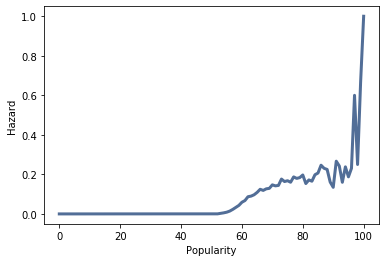

In [15]:
hf = EstimateHazardFunction(complete, ongoing)
thinkplot.Plot(hf)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Hazard')

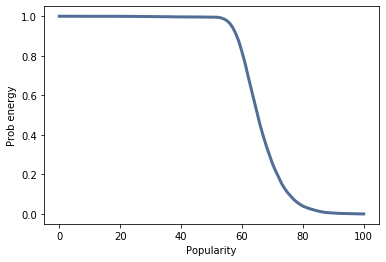

In [17]:
sf = hf.MakeSurvival()
thinkplot.Plot(sf)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Prob energy')

## Remaining lifetime

Distributions with difference shapes yield different behavior for populariy and energy.

In [50]:
complete = db_read.popularity

ongoing = db_read.energy.sample(1000)

hf = EstimateHazardFunction(complete, ongoing)
sf1 = hf.MakeSurvival()

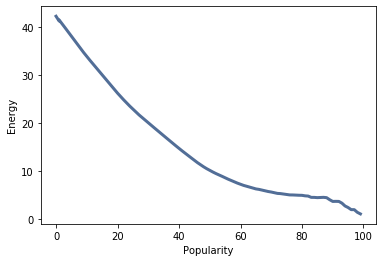

In [51]:
popul_en = sf1.RemainingLifetime()
thinkplot.Plot(popul_en)
thinkplot.Config(xlabel='Popularity',
                 ylabel='Energy')

And here's the median between popularity and energy.

## Exercises

**Exercise:**    In NSFG Cycles 6 and 7, the variable `cmdivorcx` contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [47]:
def CleanData(resp):
    """Cleans respondent data.

    resp: DataFrame
    """
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp['notdivorced'] = resp.cmdivorcx.isnull().astype(int)
    resp['duration'] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp['durationsofar'] = (resp.cmintvw - resp.cmmarrhx) / 12.0

    month0 = pd.to_datetime('1899-12-15')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

In [46]:
CleanData(resp6)
married6 = resp6[resp6.evrmarry==1]

CleanData(resp7)
married7 = resp7[resp7.evrmarry==1]

In [45]:
def ResampleDivorceCurve(resps):

    for _ in range(11):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        PlotDivorceCurveByDecade(sample,  alpha=0.1)

    thinkplot.Show(xlabel='years',
                   )

In [44]:
def ResampleDivorceCurveByDecade(resps):

    for i in range(41):
        samples = [thinkstats2.ResampleRowsWeighted(resp) 
                   for resp in resps]
        sample = pd.concat(samples, ignore_index=True)
        groups = sample.groupby('decade')
        if i == 0:
            survival.AddLabelsByDecade(groups, alpha=0.7)

        EstimateSurvivalByDecade(groups, alpha=0.1)

    thinkplot.Config(xlabel='Years',
                     ylabel='Fraction undivorced',
                   )

In [41]:
def EstimateSurvivalByDecade(groups, **options):

    thinkplot.PrePlot(len(groups))
    for name, group in groups:
        _, sf = EstimateSurvival(group)
        thinkplot.Plot(sf, **options)

In [42]:
def EstimateSurvival(resp):

    complete = resp[resp.notdivorced == 0].duration.dropna()
    ongoing = resp[resp.notdivorced == 1].durationsofar.dropna()

    hf = survival.EstimateHazardFunction(complete, ongoing)
    sf = hf.MakeSurvival()

    return hf, sf

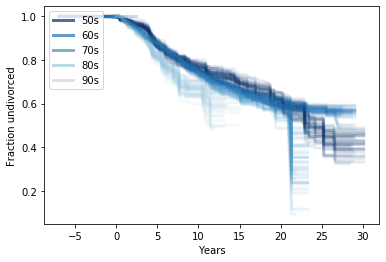

In [48]:
ResampleDivorceCurveByDecade([married6, married7])